A a machine learning model to predict the chance of a patient having a heart disease

In [156]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import joblib

In [157]:
#LOADING THE DATASET
dataset=pd.read_csv('Heart Disease dataset.csv')

In [158]:
#Loading the first 15 rows of the dataset
dataset.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [159]:
#Loading the last 10 rows of the dataset
dataset.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [160]:
#checking information about our dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [161]:
#checking the number of rows and columns
dataset.shape

(303, 14)

In [162]:
#Getting the summary statistics of our dataset
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [163]:
#Handling missing values if any
missing_data=dataset.isnull().sum()
percent_missing_data=(missing_data/dataset.shape[0])*100
print(f' Missing data is {round(percent_missing_data,2)}%')

 Missing data is age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64%


In [164]:
#handling duplicate values if any
duplicate=dataset.duplicated().any()
duplicate

True

In [165]:
# since it returned true, it shows there are some duplicates and so we have to remove them.
dataset=dataset.drop_duplicates()
# we should now get false after droping the duplicates
duplicate=dataset.duplicated().any()
duplicate

False

DATA PROCESSING.
We are going to separate our dataset into two values i.e columns whose unique values <=10 together and those whose unique values are >10 together

In [166]:
low_values=[]
high_values=[]
for column in dataset.columns:
    if dataset[column].nunique()<=10:
        low_values.append(column)
    else:
        high_values.append(column)

In [167]:
low_values

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [168]:
high_values

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [169]:
#lets load unique values in slope and then any other columns if we want 
dataset['slope'].unique()


array([0, 2, 1], dtype=int64)

In [170]:
dataset['restecg'].unique()

array([0, 1, 2], dtype=int64)

In [171]:
# in the low_values, we have columns that donot need binary encoding because they have only two values(0 and 1).
#These columns are sex and target and we shall remove them
low_values.remove('sex')
low_values.remove('target')


In [172]:
dataset=pd.get_dummies(dataset,columns=low_values,drop_first=True)# first column dropped to avoid dummy trap

In [173]:
# if we reload our dataset, we shall find the created dummy values
dataset.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


FEATURE SCALING
For the encoded features, we donot need to scale them them since they are already in the same range.

In [174]:
scaler=StandardScaler()
dataset[high_values]=scaler.fit_transform(dataset[high_values])
dataset

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.285561,0,0.478910,-0.106449,-1.161988,-0.727060,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
299,-1.042904,1,-1.232023,0.338703,-0.768384,0.135360,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
300,1.503322,1,0.707035,-1.035462,-0.374779,2.032684,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
301,0.285561,1,-0.091401,-2.235438,-1.511859,0.135360,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1


SPLITING OUR DATASET INTO TRAINING AND TESTING SETS

In [175]:
X=dataset.drop('target',axis=1)
y=dataset['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

I am going to train using four different models. The choice of the model to deploy in production will depend on 
the model having a highest accuracy score. I will use;
KNeighborsClassifier, LogisticRegression,SupportVectorClassifier and RandomForestClassifier


# KNeighbors Classifier

In [176]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
kn_ypred=knn.predict(X_test)
score_kn=round(accuracy_score(y_test,kn_ypred)*100)
print(f'The accuracy of KNeighbors Classifier is {score_kn}%')

The accuracy of KNeighbors Classifier is 87%


# SVC

In [177]:
svm=svm.SVC()
svm.fit(X_train,y_train)
svm_ypred=svm.predict(X_test)
score_svc=round(accuracy_score(y_test,svm_ypred)*100)
print(f'The accuracy of SVC is {score_svc}%')



The accuracy of SVC is 87%


# Logistic Regression

In [178]:
logistic=LogisticRegression()
logistic.fit(X_train,y_train)
logistic_ypred=logistic.predict(X_test)
score_log=round(accuracy_score(y_test,logistic_ypred)*100)
print(f'The accuracy of the Logistic Regression is {score_log}%')



The accuracy of the Logistic Regression is 90%


# Random Forest Classifier

This is a non-linear Machine learning algorithm which does not depend on distance. 
I will therefore not use the standardised data hence will reload the dataset (a fresh) since there's no need of 
encoding and scaling


In [179]:
dataset=pd.read_csv('Heart Disease dataset.csv')
dataset=dataset.drop_duplicates()
dataset.shape

(302, 14)

In [180]:
X=dataset.drop('target',axis=1)
y=dataset['target']

In [181]:
#Split the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

r_forest=RandomForestClassifier()
r_forest.fit(X_train,y_train)
rf_ypred=r_forest.predict(X_test)
score_rf=round(accuracy_score(y_test,rf_ypred)*100)
print(f'The accuracy of the Randon Forest Classifier is {score_rf}%')



The accuracy of the Randon Forest Classifier is 85%


In [182]:
scores=pd.DataFrame({'Models':['knn','SVC','Logistic','RandomForest'],'accuracy':[score_kn,
                                                                                 score_svc,
                                                                                score_log,
                                                                                score_rf]})
scores

,Models,accuracy
0,knn,87
1,SVC,87
2,Logistic,90
3,RandomForest,85


<Axes: xlabel='Models', ylabel='accuracy'>

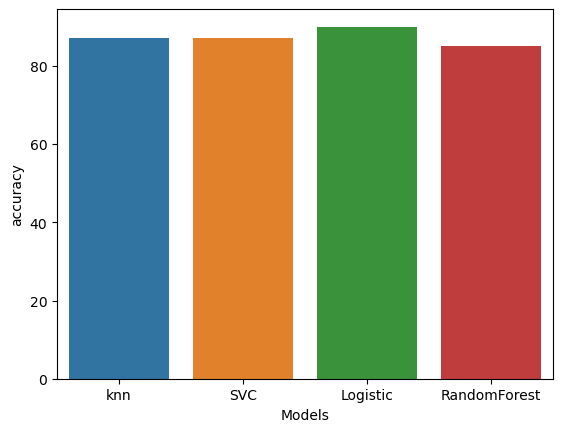

In [183]:
sns.barplot(x='Models', y='accuracy', data=scores)



The model with highest accuracy is Logistic Regression and that is what I will implement.It will be trained on the whole dataset.

In [184]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

logistic=LogisticRegression()
logistic.fit(X_scaled,y)

LogisticRegression()

# Making predictions for the model

In [185]:
details=pd.DataFrame({
    'age':57, 'sex':0, 'cp':1,'trestbps':130,'chol':200,'fbs':0,'restecg':1,'thalach':168,'exang':0,
    'oldpeak':1.0,'slope':2,'ca':2,'thal':3},index=[0])
details_scaled = scaler.transform(details)
prediction=logistic.predict(details_scaled)
if prediction[0]==0:
    print(f"You have a {score_log}% chance of not having a heart disease")
else:
    print(f"You are {score_log}% likely to have a heart disease")

You are 90% likely to have a heart disease


#SAVING THE MODEL

In [186]:
import pickle

filename = 'logistic_model.sav'
pickle.dump(logistic, open(filename, 'wb'))

# loading the saved model
logistic_model = pickle.load(open('logistic_model.sav', 'rb'))

information= (52,1,0,125,212,0,1,168,0,1.0,2,2,3)

information_array= np.asarray(information)

# reshape the array as we are predicting for one instance
information_reshaped = information_array.reshape(1,-1)

prediction = logistic_model.predict(information_reshaped)
if (prediction[0] == 0):
  print(f"You have a {round(accuracy_score(y_test,logistic_ypred)*100)}% chance of not having a heart disease")
else:
  print(f"You are {round(accuracy_score(y_test,logistic_ypred)*100)}% likely to have a heart disease")

You have a 90% chance of not having a heart disease
